In [ ]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, max_error, r2_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/abalone.csv")

In [ ]:
# Adding 1.5 to the rings to get age and dropping the rings column
data["Age"] = data["Rings"] + 1.5
data= data.drop("Rings", axis= 1)

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


checking missing values

In [ ]:

data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
data.shape

(4177, 9)

In [ ]:
data_col = data.columns

In [ ]:
#Checking for unique values
for c in data_col:
    print("{} has {} unique values".format(c, data[c].nunique()))

Sex has 3 unique values
Length has 134 unique values
Diameter has 111 unique values
Height has 51 unique values
Whole weight has 2429 unique values
Shucked weight has 1515 unique values
Viscera weight has 880 unique values
Shell weight has 926 unique values
Age has 28 unique values


VISUALIZATIONS

Univariate Analysis

In [ ]:
continuous_col = [i for i in data_col if data[i].nunique() > 10 and i != "Age"]
discrete_col = [i for i in data_col if i not in continuous_col]

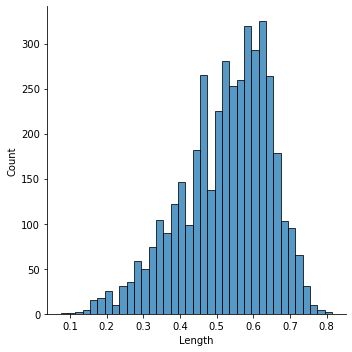

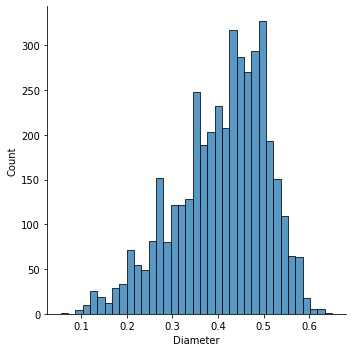

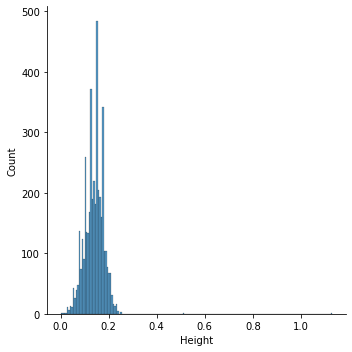

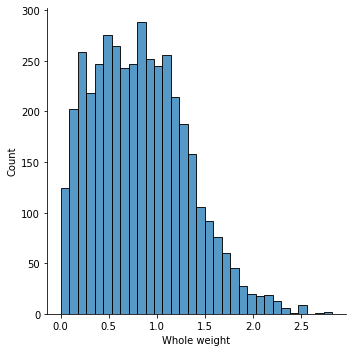

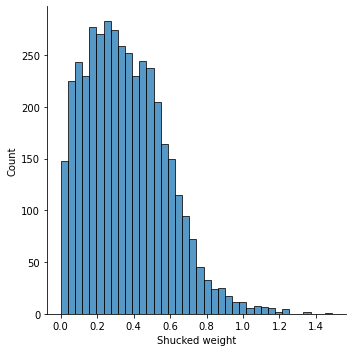

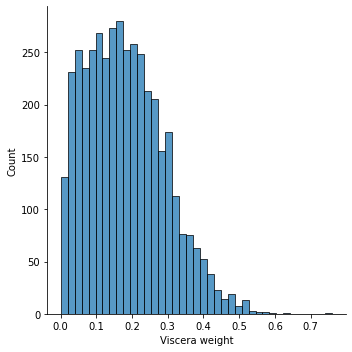

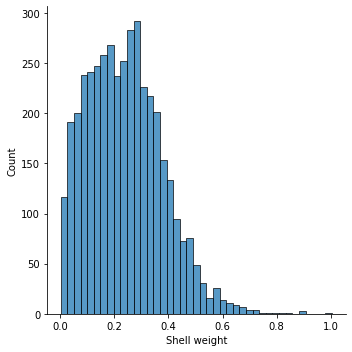

In [ ]:
# Distribution of data
for c in continuous_col:
    sns.displot(data[c])
  

Checking for outliers

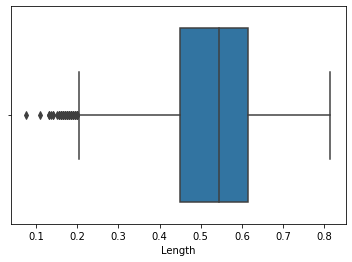

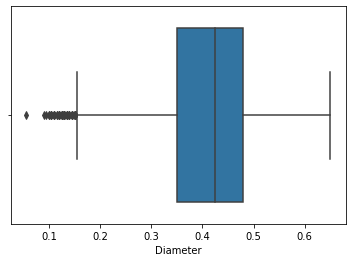

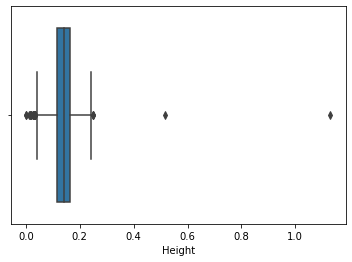

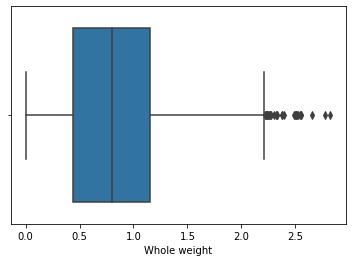

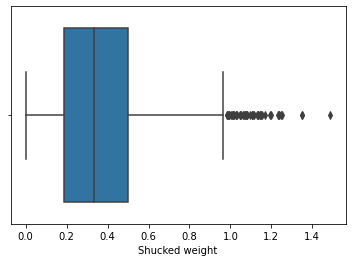

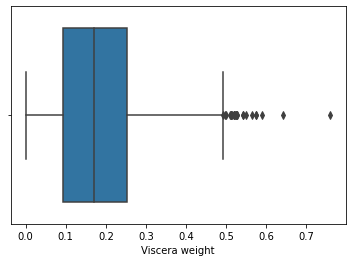

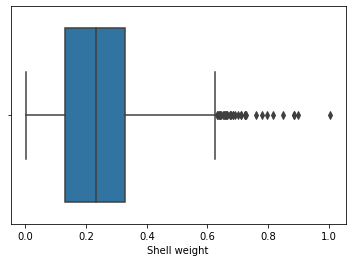

In [ ]:

for c in continuous_col:
    sns.boxplot(x = data[c])
    plt.show()

Univariate Analysis

In [ ]:
cor=data.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Bi-variate Analysis

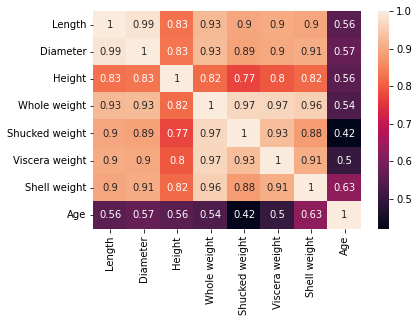

In [ ]:
import seaborn as sns
sns.heatmap(cor,annot=True)

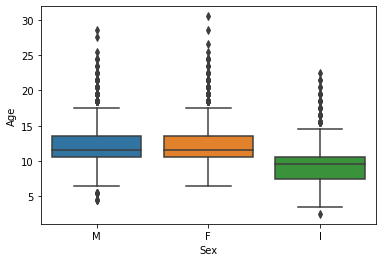

In [ ]:
sns.boxplot(x='Sex',y='Age',data=data)

In [ ]:
data['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [ ]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Multi_Variate analysis

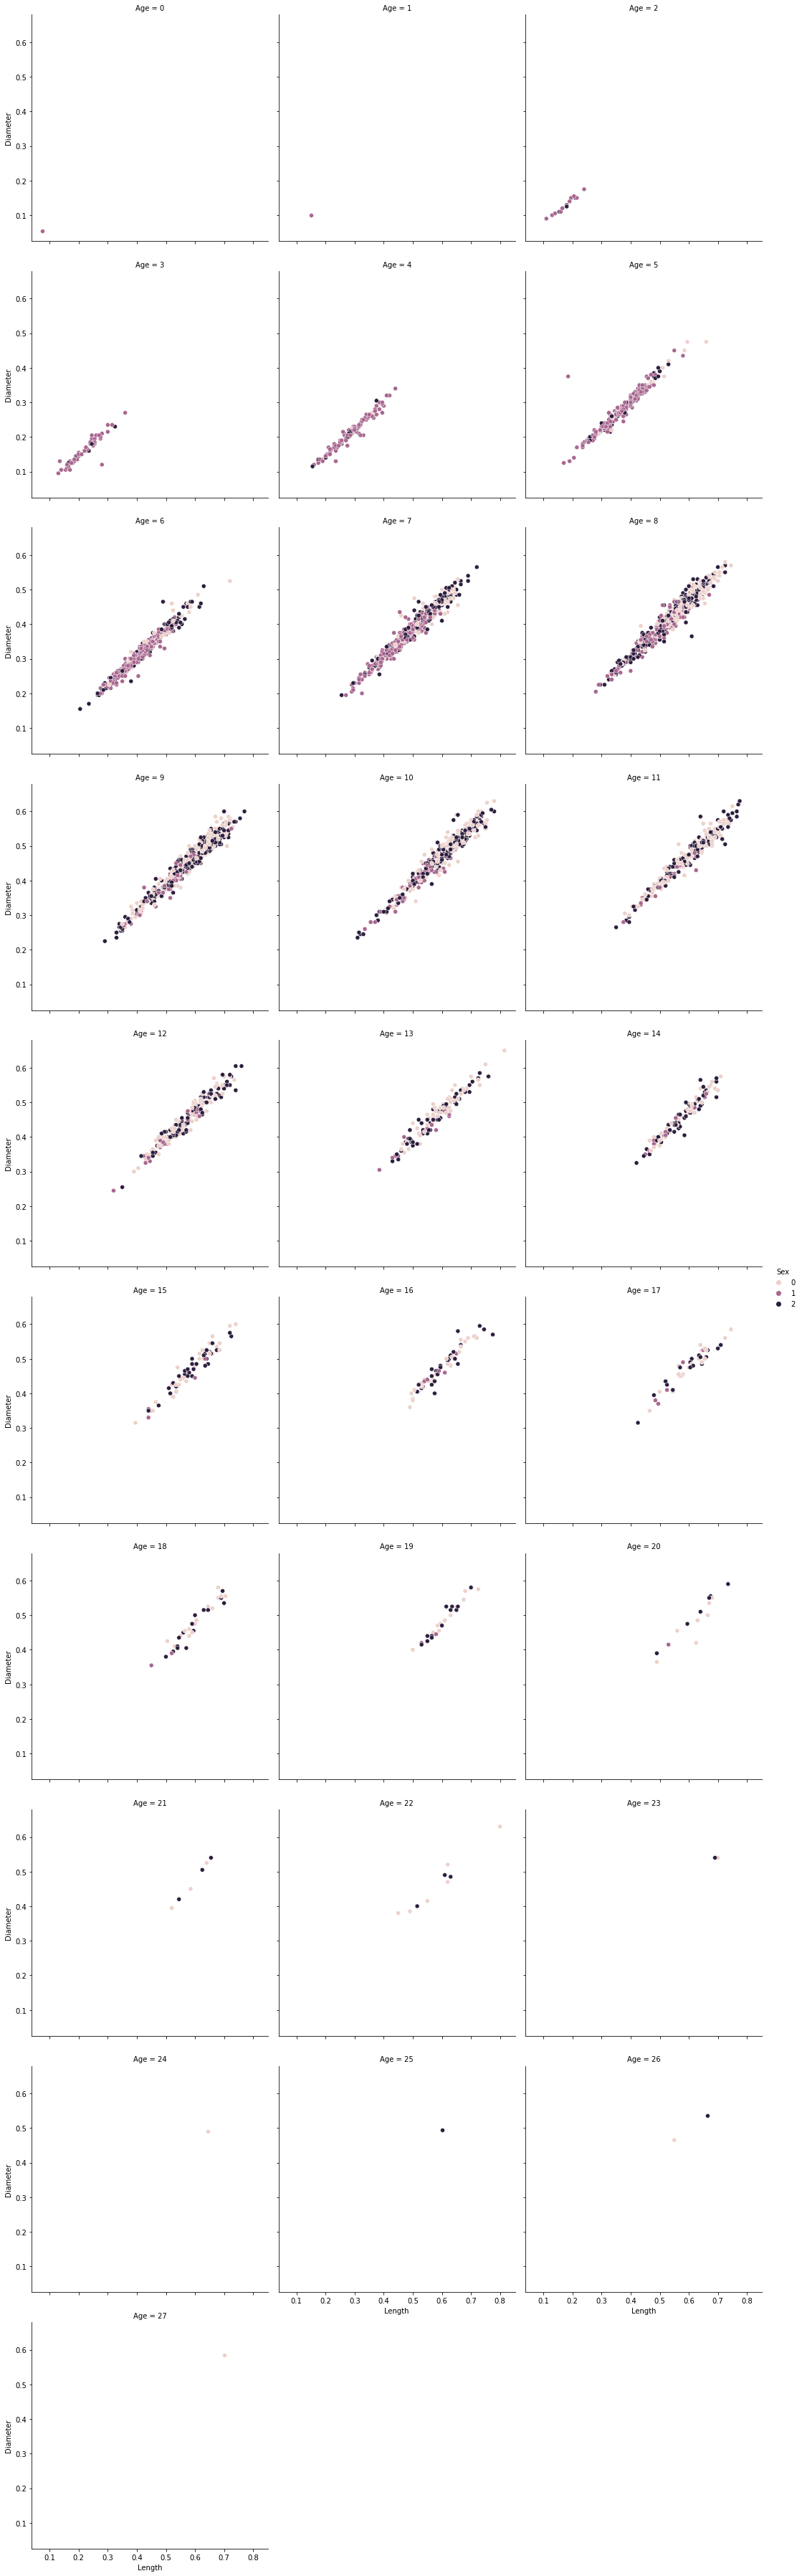

In [ ]:
sns.relplot(data=data,x="Length",y='Diameter',hue='Sex',col='Age',col_wrap=3)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(data.Age.value_counts())

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: Age, dtype: int64


In [ ]:
data.Age=le.fit_transform(data.Age)
print(data.Age.value_counts())

8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: Age, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(data.Sex.value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [ ]:
data.Sex=le.fit_transform(data.Sex)
print(data.Sex.value_counts())

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6


Independent & Dependent variables

In [ ]:
x=data.iloc[:,:8]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
y=data.iloc[:,8:]
y

,Age
0,14
1,6
2,8
3,9
4,6
...,...
4172,10
4173,9
4174,8
4175,9


TRAIN,TEST & SPLIT


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape


(3341, 8)

In [ ]:
y_train.shape

(3341, 1)

In [ ]:
x_test.shape

(836, 8)

In [ ]:
y_test.shape

(836, 1)

MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test[0:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,2,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,1,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,2,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [ ]:
mlr.predict(x_test[0:5])

array([[12.0578998 ],
       [ 8.65069759],
       [ 9.38007246],
       [ 4.64401046],
       [ 9.70865673]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

0.07516513404339265

performance using Metrics

In [ ]:
mlr.predict([[1,0.450,0.389,0.085,0.3232,0.3456,0.1234,0.5212]])

NameError: ignored

In [ ]:
pred = mlr.predict(x_test)

In [ ]:
pred.shape

(836, 1)

In [ ]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [ ]:
print("MSE:", mse)
print("r2:", r2)

MSE: 5.072535371605269
r2: 0.5310006918790076
